<a href="https://colab.research.google.com/github/DanielKorenDataScience/ClassificationProject/blob/main/Classification_Project_Shufersal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification Project

for Shufersal on-line orders, for replacing of missing products, will predict the replacement success!

In [55]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display
p = print
d = display

# Get Data

## Raw Data

To run the raw section, one must load Sweets_ver2.csv to local google drive and change the next line to True

In [92]:
RAW = False

In [57]:
def get_raw(fname):
  data_url = 'https://github.com/DanielKorenDataScience/ClassificationProject/blob/main/' + fname + '.csv?raw=true'
  resp = requests.get(data_url)
  text = resp.text
  
  with open(fname + '.csv', 'w') as fh:
    fh.write(text)

In [58]:
def diff_list(li1, li2):
  return [i for i in li1 + li2 if i not in li1 or i not in li2]

In [59]:
if RAW:    
  df1 = pd.read_csv('/content/drive/MyDrive/Sweets_ver2.csv', encoding='ISO-8859-8', nrows=1)
  df2 = pd.read_csv('/content/drive/MyDrive/Sweets_ver2.csv', encoding='ISO-8859-8', usecols=[i for i in range(82) if not i in[0,8,10,12,14,16,18,20,24,26,27,48,50,52,54,56,58,62,64,65]])

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 82 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   OrderNumbert                1 non-null      int64  
 1   HouseHoldID                 1 non-null      int64  
 2   LocationCityName            1 non-null      object 
 3   QuarterNumber               1 non-null      int64  
 4   MonthNumber                 1 non-null      int64  
 5   WeekNumber                  1 non-null      int64  
 6   DayNumberInWeek             1 non-null      int64  
 7   PeriodHoliday               1 non-null      object 
 8   TransactionDate             1 non-null      object 
 9   DepartmentCode              1 non-null      int64  
 10  DepartmentName              1 non-null      object 
 11  CategoryCode                1 non-null      int64  
 12  CategoryName                1 non-null      object 
 13  GroupCode                   1 non-null 

Eliminating unwanted columns - mostly descriptive columns

In [62]:
if RAW:
  d(diff_list(list(df1.columns), list(df2.columns)))

['OrderNumbert',
 'TransactionDate',
 'DepartmentName',
 'CategoryName',
 'GroupName',
 'SubGroupName',
 'CompoundIDDesc',
 'ProductDescription',
 'VendorName',
 'ItemsPerPackageWH',
 'DescriptionTavit',
 'DepartmentNameSusb',
 'CategoryNameSubs',
 'GroupNameSubs',
 'SubGroupNameSubs',
 'CompoundIDDescSubs',
 'ProductDescriptionSubs',
 'VendorNameSubs',
 'ItemsPerPackageWHSubs',
 'DescriptionTavitSubs']

In [63]:
if RAW:
  d(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54460 entries, 0 to 54459
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   HouseHoldID                 54460 non-null  int64  
 1   LocationCityName            54460 non-null  object 
 2   QuarterNumber               54460 non-null  int64  
 3   MonthNumber                 54460 non-null  int64  
 4   WeekNumber                  54460 non-null  int64  
 5   DayNumberInWeek             54460 non-null  int64  
 6   PeriodHoliday               54460 non-null  object 
 7   DepartmentCode              54460 non-null  int64  
 8   CategoryCode                54460 non-null  int64  
 9   GroupCode                   54460 non-null  int64  
 10  SubGroupCode                54460 non-null  int64  
 11  CompoundID                  54460 non-null  int64  
 12  ParentProductNumber         54460 non-null  int64  
 13  BrandIndDesc                544

None

In [64]:
# Fix Typo mistake
if RAW: 
  df2.rename(columns={'OrderNumbert': 'OrderNumber','BrandIndDescSuss': 'BrandIndDescSubs', 'ProductNumberSubs': 'ParentProductNumberSubs', 
                    'NetSaleNoVatPrdSubs': 'NetSaleNoVatPrdLast3MonthsSubs', 'CafiotSucarSusb': 'CafiotSucarSubs'}, inplace=True)

Eliminating nulls

In [65]:
# Fill na
if RAW:
  df2.fillna({'QuantSale': 1, 'QuantSaleSubs': 1}, inplace=True)
  df2.fillna(0, inplace=True)
  d(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54460 entries, 0 to 54459
Data columns (total 62 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   HouseHoldID                     54460 non-null  int64  
 1   LocationCityName                54460 non-null  object 
 2   QuarterNumber                   54460 non-null  int64  
 3   MonthNumber                     54460 non-null  int64  
 4   WeekNumber                      54460 non-null  int64  
 5   DayNumberInWeek                 54460 non-null  int64  
 6   PeriodHoliday                   54460 non-null  object 
 7   DepartmentCode                  54460 non-null  int64  
 8   CategoryCode                    54460 non-null  int64  
 9   GroupCode                       54460 non-null  int64  
 10  SubGroupCode                    54460 non-null  int64  
 11  CompoundID                      54460 non-null  int64  
 12  ParentProductNumber             

None

In [66]:
if RAW:
  df2.to_csv("Shufersal.csv", index = False)
  p(df2.shape)

(54460, 62)


In [67]:
if RAW:
  df = pd.read_csv('Shufersal.csv', index_col=False)
  p(df.shape)

(54460, 62)


## Encoding categories

In [68]:
df.isPromo.value_counts()

PromoSusbDiffPromo    30490
noPromo               22062
PromoSusbSamePromo     1908
Name: isPromo, dtype: int64

In [69]:
enc.fit(['noPromo', 'PromoSusbSamePromo', 'PromoSusbDiffPromo'])
df.isPromo = enc.transform(df.isPromo)

In [70]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
if RAW:
  for col in ['LocationCityName', 'PeriodHoliday', 'BrandIndDesc', 'BrandName', 'BrandIndDescSubs', 'BrandNameSubs']:
    p(col)
    p(pd.DataFrame(df[col].value_counts()).index)
    df[col] = enc.fit_transform(df[col])
    p(pd.DataFrame(df[col].value_counts()).index)

LocationCityName
Index(['ראשון לציון', 'תל אביב', 'חיפה', 'רחובות', 'ירושלים', 'כפר סבא',
       'פתח תקוה', 'ראש העין', 'רמת גן', 'רעננה', 'רמת השרון', 'נס ציונה',
       'מודיעין', 'חולון', 'גבעתיים', 'נתניה', 'הוד השרון', 'אילת', 'יהוד',
       'אשקלון', 'קרית מוצקין', 'חריש', 'כרמיאל', 'הרצליה', 'רמת אביב א',
       'שוהם', 'עפולה', 'באר יעקב', 'ערד', 'צור-יגאל', 'מזכרת בתיה', 'בני ברק',
       'חדרה', 'טירת הכרמל', 'מעלה אדומים', 'ירוחם', 'זכרון יעקב', 'רמלה',
       'בנימינה', 'קרית שמונה', 'מגדל העמק', 'יבנה', 'אור עקיבא', 'קרית אתא',
       'קרית ביאליק', 'עמק חפר', 'קרית עקרון', 'תל מונד', 'בת ים', 'קצרין',
       'בית שאן', 'פרדס חנה', 'מבשרת ציון', 'בית-שמש', 'כפר תבור',
       'משמר השרון', 'פרדסיה', 'שדרות', 'קרית גת', 'נהריה', 'אריאל', 'טבריה',
       'צור משה', 'קרית חיים', 'אשדוד', 'כרכור', 'מפרץ חיפה', 'מעלות',
       'גבעת אולגה', 'נשר', 'באר טוביה', 'צפת', 'חצור-הגלילית', 'כפר ורדים',
       'אופקים', 'בית חשמונאי', 'גבעת עדה', 'בת חפר', 'גבעת שמואל', 'שילת',
       

## Calc diff vector

In [71]:
df.columns

Index(['HouseHoldID', 'LocationCityName', 'QuarterNumber', 'MonthNumber',
       'WeekNumber', 'DayNumberInWeek', 'PeriodHoliday', 'DepartmentCode',
       'CategoryCode', 'GroupCode', 'SubGroupCode', 'CompoundID',
       'ParentProductNumber', 'BrandIndDesc', 'BrandName', 'VendorNumber',
       'UnitOfMeasure', 'Price', 'Quantity', 'cntPrdAll', 'NetSaleAmountAll',
       'NetSaleNoVatPrdLast3Months', 'QuantSale', 'cntMonths',
       'DiscountPerUnit', 'isPromo', 'Energy', 'Pachmema', 'Natran', 'Helbon',
       'Shuman', 'ShumanRavuy', 'ShumanTrans', 'Colastrol', 'SivimTzunatim',
       'CafiotSucar', 'DepartmentCodeSubs', 'CategoryCodeSubs',
       'GroupCodeSubs', 'SubGroupCodeSubs', 'CompoundIDSubs',
       'ParentProductNumberSubs', 'BrandIndDescSubs', 'BrandNameSubs',
       'VendorNumberSubs', 'UnitOfMeasureSubs', 'PriceSubs',
       'NetSaleNoVatPrdLast3MonthsSubs', 'QuantSaleSubs', 'cntMonthsSubs',
       'DiscountPerUnitSubs', 'EnergySubs', 'PachmemaSubs', 'NatranSubs',
      

In [72]:
if RAW:
  for col in ['DepartmentCode', 'CategoryCode', 'GroupCode', 'SubGroupCode',
       'CompoundID', 'ParentProductNumber', 'BrandIndDesc',
       'VendorNumber', 'UnitOfMeasure', 'Price', 'NetSaleNoVatPrdLast3Months', 'Energy', 'Pachmema',
       'Natran', 'Helbon', 'Shuman', 'ShumanRavuy', 'ShumanTrans', 'Colastrol',
       'SivimTzunatim', 'CafiotSucar', 'QuantSale', 'cntMonths', 'DiscountPerUnit']:
    df[col + 'Diff'] = df[col] - df[col + 'Subs']

In [73]:
if RAW:
  for col in ['DepartmentCode', 'CategoryCode', 'GroupCode', 'SubGroupCode',
       'CompoundID', 'ParentProductNumber', 'VendorNumber', 'BrandIndDesc']:
    df[col + 'Diff'] = (df[col + 'Diff'] != 0)
    df[col + 'Diff'] = enc.fit_transform(df[col + 'Diff'])

In [74]:
if RAW:
  p(df.shape)

(54460, 86)


In [75]:
if RAW:
  df.to_csv("Shufersal_with_diff.csv", index = False)

In [76]:
if RAW:
  df = pd.read_csv('Shufersal_with_diff.csv', index_col=False)
  p(df.shape)

(54460, 86)


In [77]:
if RAW:
  d(df.head())

,HouseHoldID,LocationCityName,QuarterNumber,MonthNumber,WeekNumber,DayNumberInWeek,PeriodHoliday,DepartmentCode,CategoryCode,GroupCode,SubGroupCode,CompoundID,ParentProductNumber,BrandIndDesc,BrandName,VendorNumber,UnitOfMeasure,Price,Quantity,cntPrdAll,NetSaleAmountAll,NetSaleNoVatPrdLast3Months,QuantSale,cntMonths,DiscountPerUnit,isPromo,Energy,Pachmema,Natran,Helbon,Shuman,ShumanRavuy,ShumanTrans,Colastrol,SivimTzunatim,CafiotSucar,DepartmentCodeSubs,CategoryCodeSubs,GroupCodeSubs,SubGroupCodeSubs,...,PriceSubs,NetSaleNoVatPrdLast3MonthsSubs,QuantSaleSubs,cntMonthsSubs,DiscountPerUnitSubs,EnergySubs,PachmemaSubs,NatranSubs,HelbonSubs,ShumanSubs,ShumanRavuySubs,ShumanTransSubs,ColastrolSubs,SivimTzunatimSubs,CafiotSucarSubs,CorrelateItemStatusCode,DepartmentCodeDiff,CategoryCodeDiff,GroupCodeDiff,SubGroupCodeDiff,CompoundIDDiff,ParentProductNumberDiff,BrandIndDescDiff,VendorNumberDiff,UnitOfMeasureDiff,PriceDiff,NetSaleNoVatPrdLast3MonthsDiff,EnergyDiff,PachmemaDiff,NatranDiff,HelbonDiff,ShumanDiff,ShumanRavuyDiff,ShumanTransDiff,ColastrolDiff,SivimTzunatimDiff,CafiotSucarDiff,QuantSaleDiff,cntMonthsDiff,DiscountPerUnitDiff
0,1,87,202101,202102,202108,1,1,10,6,700,3,-8000500249352,8000500249352,52,0,914547,0.20,18.90,4,22,800.63,57747.16,0.8,16,0.00,2,568.0,49.5,107.0,8.6,37.8,17.3,0.5,15.0,0.0,0.00,10,6,700,6,...,9.90,46128.25,0.8,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1,0,0,0,1,1,0,1,0,0.12,9.0,11618.91,568.0,49.5,107.0,8.6,37.8,17.3,0.5,15.0,0.0,0.00,0.0,3,0.00
1,2,87,202101,202103,202112,1,0,10,6,699,4,2900,178134,44,0,912069,0.40,19.60,1,12,207.30,141798.59,0.6,16,0.00,2,514.0,51.0,0.0,5.3,31.0,19.2,0.5,0.0,0.0,12.25,10,6,699,4,...,10.00,67947.93,0.8,15,0.0,514.0,51.0,0.0,5.3,31.0,19.2,0.5,0.0,0.0,12.25,1,0,0,0,0,1,0,1,0,0.10,9.6,73850.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.2,1,0.00
2,3,87,202101,202101,202101,5,1,10,6,699,3,12043,7610400091060,25,0,912317,0.10,14.90,1,69,1813.38,80904.21,0.7,11,2.82,0,534.0,51.0,34.0,6.9,32.0,17.0,0.5,10.0,0.0,11.50,10,6,699,3,...,9.90,20718.49,1.0,13,0.0,532.0,51.0,21.0,6.5,30.0,18.0,0.5,7.5,7.8,12.00,0,0,0,0,0,1,0,1,1,0.01,5.0,60185.72,2.0,0.0,13.0,0.4,2.0,-1.0,0.0,2.5,-7.8,-0.50,-0.3,-2,2.82
3,4,87,202101,202101,202104,5,0,10,6,699,2,8579,7290112490124,53,0,912268,0.09,2.95,1,54,924.45,18277.75,1.0,14,0.90,0,527.0,67.4,117.0,7.4,25.3,16.3,0.5,11.0,0.0,12.75,10,6,699,2,...,2.95,32291.02,0.9,16,0.0,506.0,64.2,132.0,8.1,24.1,14.9,0.5,8.0,0.0,12.50,1,0,0,0,0,0,0,1,0,0.00,0.0,-14013.27,21.0,3.2,-15.0,-0.7,1.2,1.4,0.0,3.0,0.0,0.25,0.1,-2,0.90
4,5,87,202101,202102,202105,5,1,10,6,699,3,30727,7296073382416,55,1,913725,0.10,8.00,4,69,1468.61,45785.99,0.8,16,1.86,0,607.0,13.0,10.0,11.0,53.0,32.0,0.5,0.0,17.0,2.00,10,6,699,3,...,8.00,41347.56,0.9,16,0.0,603.0,23.0,10.0,8.7,50.0,30.0,0.5,0.0,13.0,4.50,1,0,0,0,0,0,0,1,0,0.00,0.0,4438.43,4.0,-10.0,0.0,2.3,3.0,2.0,0.0,0.0,4.0,-2.50,-0.1,0,1.86


# Get ready Data

In [78]:
get_raw('Shufersal_with_diff')

In [79]:
df = pd.read_csv('Shufersal_with_diff.csv', encoding='ISO-8859-8')
p(df.shape)
df.head()

(54460, 82)


,HouseHoldID,LocationCityName,QuarterNumber,MonthNumber,WeekNumber,DayNumberInWeek,PeriodHoliday,DepartmentCode,CategoryCode,GroupCode,SubGroupCode,CompoundID,ParentProductNumber,BrandIndDesc,BrandName,VendorNumber,UnitOfMeasure,Price,Quantity,cntPrdAll,NetSaleAmountAll,NetSaleNoVatPrdLast3Months,QuantSale,cntMonths,DiscountPerUnit,isPromo,Energy,Pachmema,Natran,Helbon,Shuman,ShumanRavuy,ShumanTrans,Colastrol,SivimTzunatim,CafiotSucar,DepartmentCodeSubs,CategoryCodeSubs,GroupCodeSubs,SubGroupCodeSubs,...,BrandIndDescSubs,VendorNumberSubs,UnitOfMeasureSubs,PriceSubs,NetSaleNoVatPrdLast3MonthsSubs,QuantSaleSubs,cntMonthsSubs,DiscountPerUnitSubs,EnergySubs,PachmemaSubs,NatranSubs,HelbonSubs,ShumanSubs,ShumanRavuySubs,ShumanTransSubs,ColastrolSubs,SivimTzunatimSubs,CafiotSucarSubs,CorrelateItemStatusCode,DepartmentCodeDiff,CategoryCodeDiff,GroupCodeDiff,SubGroupCodeDiff,CompoundIDDiff,ParentProductNumberDiff,BrandIndDescDiff,VendorNumberDiff,UnitOfMeasureDiff,PriceDiff,NetSaleNoVatPrdLast3MonthsDiff,EnergyDiff,PachmemaDiff,NatranDiff,HelbonDiff,ShumanDiff,ShumanRavuyDiff,ShumanTransDiff,ColastrolDiff,SivimTzunatimDiff,CafiotSucarDiff
0,1,87,202101,202102,202108,1,1,10,6,700,3,-8000500249352,8000500249352,52,0,914547,0.20,18.90,4,22,800.63,57747.16,0.8,16,0.00,2,568.0,49.5,107.0,8.6,37.8,17.3,0.5,15.0,0.0,0.00,10,6,700,6,...,67,914547,0.09,9.90,46128.25,0.8,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1,0,0,0,1,1,0,-15,0,1,9.0,11618.91,568.0,49.5,107.0,8.6,37.8,17.3,0.5,15.0,0.0,0.00
1,2,87,202101,202103,202112,1,0,10,6,699,4,2900,178134,44,0,912069,0.40,19.60,1,12,207.30,141798.59,0.6,16,0.00,2,514.0,51.0,0.0,5.3,31.0,19.2,0.5,0.0,0.0,12.25,10,6,699,4,...,58,912069,0.30,10.00,67947.93,0.8,15,0.0,514.0,51.0,0.0,5.3,31.0,19.2,0.5,0.0,0.0,12.25,1,0,0,0,0,1,0,-14,0,1,9.6,73850.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,3,87,202101,202101,202101,5,1,10,6,699,3,12043,7610400091060,25,0,912317,0.10,14.90,1,69,1813.38,80904.21,0.7,11,2.82,0,534.0,51.0,34.0,6.9,32.0,17.0,0.5,10.0,0.0,11.50,10,6,699,3,...,16,910165,0.09,9.90,20718.49,1.0,13,0.0,532.0,51.0,21.0,6.5,30.0,18.0,0.5,7.5,7.8,12.00,0,0,0,0,0,1,0,9,1,1,5.0,60185.72,2.0,0.0,13.0,0.4,2.0,-1.0,0.0,2.5,-7.8,-0.50
3,4,87,202101,202101,202104,5,0,10,6,699,2,8579,7290112490124,53,0,912268,0.09,2.95,1,54,924.45,18277.75,1.0,14,0.90,0,527.0,67.4,117.0,7.4,25.3,16.3,0.5,11.0,0.0,12.75,10,6,699,2,...,69,912268,0.09,2.95,32291.02,0.9,16,0.0,506.0,64.2,132.0,8.1,24.1,14.9,0.5,8.0,0.0,12.50,1,0,0,0,0,0,0,-16,0,0,0.0,-14013.27,21.0,3.2,-15.0,-0.7,1.2,1.4,0.0,3.0,0.0,0.25
4,5,87,202101,202102,202105,5,1,10,6,699,3,30727,7296073382416,55,1,913725,0.10,8.00,4,69,1468.61,45785.99,0.8,16,1.86,0,607.0,13.0,10.0,11.0,53.0,32.0,0.5,0.0,17.0,2.00,10,6,699,3,...,71,913725,0.10,8.00,41347.56,0.9,16,0.0,603.0,23.0,10.0,8.7,50.0,30.0,0.5,0.0,13.0,4.50,1,0,0,0,0,0,0,-16,0,0,0.0,4438.43,4.0,-10.0,0.0,2.3,3.0,2.0,0.0,0.0,4.0,-2.50


# Models

In [80]:
from sklearn.model_selection import train_test_split

X = df.drop('CorrelateItemStatusCode', axis=1)
y = df.CorrelateItemStatusCode.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

In [81]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import math

pd.set_option("precision", 2)
df_result = pd.DataFrame()

In [82]:
def report_old(clf, X, y, data_type='Test'):
  p()
  p(type(clf).__name__ + ': ' + data_type)
  p('_____________________________________________________')
  acc = accuracy_score(y_true=y, y_pred=clf.predict(X))
  cm = pd.DataFrame(confusion_matrix(y_true=y, y_pred=clf.predict(X)),
                    index=clf.classes_,
                    columns=clf.classes_)
  d(cm)
  rep = classification_report(y_true=y, y_pred=clf.predict(X), zero_division=1, output_dict=True)
  rep =  pd.DataFrame(rep)
  rep.drop(['accuracy', 'macro avg', 'weighted avg'], axis=1, inplace=True)
  rep = rep.T
  rep['accuracy'] = acc
  rep.support = rep.support.astype(int)
  cols = list(rep.columns[:3]) + ['accuracy', 'support']
  rep = rep[cols]
  d(rep)
  return

In [83]:
def report(clf, X, y, data_type='Test'):
  global df_result
  name = type(clf).__name__ + ': ' + data_type
  acc = accuracy_score(y_true=y, y_pred=clf.predict(X))
  index = [(name, clf.classes_[0]), (name, clf.classes_[1])]
  cm = pd.DataFrame(confusion_matrix(y_true=y, y_pred=clf.predict(X)),
                    index=clf.classes_,
                    columns=clf.classes_)
  cm.reset_index(drop=True, inplace=True)
  rep = classification_report(y_true=y, y_pred=clf.predict(X), zero_division=1, output_dict=True)
  rep =  pd.DataFrame(rep)
  rep.drop(['accuracy', 'macro avg', 'weighted avg'], axis=1, inplace=True)
  rep = rep.T
  rep['accuracy'] = acc
  rep.support = rep.support.astype(int)
  cols = list(rep.columns[:3]) + ['accuracy', 'support']
  rep = rep[cols]
  rep['precision_avg'] = rep.precision.mean()
  rep['recall_avg'] = rep.recall.mean()
  rep['f1-score_avg'] = rep['f1-score'].mean()
  rep.reset_index(drop=True, inplace=True)
  df = cm.join(rep)
  df['name'] = name
  df.reset_index(inplace=True)
  #df.set_index(['name', 'index'], inplace=True)
  df_result.reset_index(inplace=True)
  df_result = df_result.append(df, ignore_index=True)
  df_result.set_index(['name', 'index'], inplace=True)
  #d(df_result)
  return

In [84]:
def showFeatureImportance(model, X_train=X_train, threshold=0):
  if type(model).__name__ == 'LogisticRegression':  # no features importance data
    w0 = model.intercept_[0]
    w = model.coef_[0]
    fx_imp = pd.Series(w, index=X_train.columns)
  else:
    fx_imp = pd.Series(model.feature_importances_, index=X_train.columns)
  fx_imp /= fx_imp.sum()
  fx_imp = fx_imp.sort_values()
  fx_imp = fx_imp[fx_imp > threshold]
  fig = plt.figure(figsize=(5,5))
  plt.xlim(0, 1)
  fx_imp.plot(kind='barh', title=type(model).__name__ )

In [85]:
def process_model(model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, plot=False, threshold=0):
  p('running: ', type(model).__name__)
  model.fit(X_train, y_train)
  report(model, X_train, y_train, 'Train')
  report(model, X_test, y_test)
  if plot:
    showFeatureImportance(model, X_train, threshold) 

In [86]:
from sklearn.linear_model import LogisticRegression, BayesianRidge, Lasso, Ridge
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingRegressor, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

running:  LogisticRegression
running:  LogisticRegression
running:  GradientBoostingClassifier
running:  AdaBoostClassifier
running:  AdaBoostClassifier
running:  RandomForestClassifier
running:  KNeighborsClassifier


0  ...  f1-score_avg
name                              index           ...              
LogisticRegression: Train         0          0.0  ...          0.40
                                  1          0.0  ...          0.40
LogisticRegression: Test          0          0.0  ...          0.40
                                  1          0.0  ...          0.40
LogisticRegression: Train         0          0.0  ...          0.40
                                  1          0.0  ...          0.40
LogisticRegression: Test          0          0.0  ...          0.40
                                  1          0.0  ...          0.40
GradientBoostingClassifier: Train 0       7967.0  ...          0.79
                                  1       2087.0  ...          0.79
GradientBoostingClassifier: Test  0       3396.0  ...          0.78
                                  1        951.0  ...          0.78
AdaBoostClassifier: Train         0       7725.0  ...          0.76
                                  1       2680.0  ...          0.76
AdaBoostClassifier: Test          0       3304.0  ...          0.76
                                  1       1206.0  ...          0.76
AdaBoostClassifier: Train         0       7324.0  ...          0.76
                                  1       2036.0  ...          0.76
AdaBoostClassifier: Test          0       3162.0  ...          0.76
                                  1        941.0  ...          0.76
RandomForestClassifier: Train     0      12647.0  ...          1.00
                                  1          1.0  ...          1.00
RandomForestClassifier: Test      0       4079.0  ...          0.84
                                  1       1008.0  ...          0.84
KNeighborsClassifier: Train       0       3754.0  ...          0.60
                                  1       2490.0  ...          0.60
KNeighborsClassifier: Test        0       1519.0  ...          0.58
                                  1       1197.0  ...          0.58

[28 rows x 10 columns]

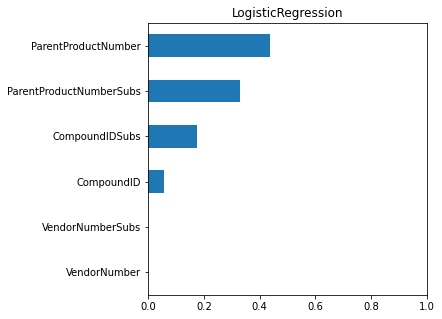

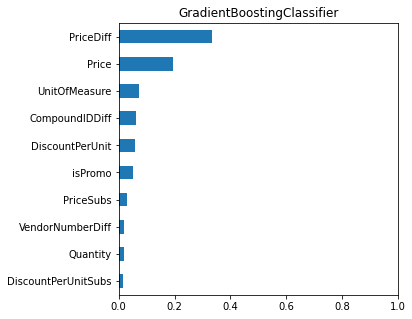

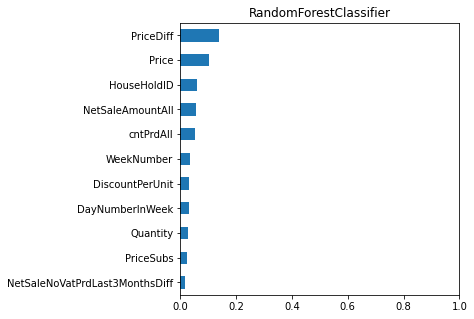

In [87]:
df_result = pd.DataFrame()

process_model(LogisticRegression(max_iter=1000), threshold=0.0000005)  # did not fit, return accuracy=0, so we increased max_iter from default 100
process_model(LogisticRegression(C=100, max_iter=1000, fit_intercept=False, warm_start=True), threshold=0.0000005, plot=True)
process_model(GradientBoostingClassifier(n_estimators=100), plot=True, threshold=0.015)
process_model(AdaBoostClassifier(n_estimators=100))  # base estimator is DecisionTreeClassifier initialized with max_depth=1
process_model(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5), n_estimators=100, learning_rate=0.01))
process_model(RandomForestClassifier(n_estimators=64), plot=True, threshold=0.015)
process_model(KNeighborsClassifier(n_neighbors=39))

if False: # ERROR: Classification metrics can't handle a mix of binary and continuous targets
  process_model(GradientBoostingRegressor(n_estimators=100, max_depth=5))
  process_model(BayesianRidge())
  process_model(Lasso())
  process_model(Ridge(alpha = 0.5))
if False: ## too long > 4 minutes
  process_model(LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, C=0.1, max_iter=20000)) # max_iter increaed from default 1000 to 3000, 6000, 20000 because did not coverged warning
  from sklearn import svm
  process_model(svm.SVC())
  process_model(svm.SVR())

d(df_result)

# TODO:

In [88]:
if False:
  from sklearn.cross_validation import cross_val_score
  from sklearn.ensemble import VotingClassifier

  process_model(VotingClassifier(estimators=[('GBR', model1), ('BR', model2), ('KNN', model3)], voting='soft'))

run a model with the important feature alone to show is it a must or just necessary (if the drop in precision is large it is not a must)?

> ### Bagging (Bootstrap Aggregation)

> One classifier ("base model") and try to fit many different subsamples of the data

> The hyper-parameters "max_samples" and "max_features" control the size of the subsets

> The hyper-parameters "bootstrap" and "bootstrap_features" control wether the samples and the features are drawn with (or without) replacement

In [89]:
clf_base = DecisionTreeClassifier(max_depth=5)

In [90]:
clf_bagging = BaggingClassifier(base_estimator=clf_base, n_estimators=50)
clf_bagging.fit(X_train, y_train)

clf_bagging.score(X_train, y_train)
clf_bagging.score(X_test, y_test)

0.7827763496143959

In [91]:
## Converting the categories column (hour and day.of.week) to dummies column improve dramatically the accuracy of the train (up to 0.808 from 0.585)
dessert1 = pd.get_dummies(dessert, columns=['day.of.week', 'hour'])

NameError: ignored